## **Project Description:**
**Impact of Noise on K-Means Clustering and the Role of PCA**

This project investigates the influence of noise on K-Means clustering performance and explores the potential benefits of dimensionality reduction using Principal Component Analysis (PCA) for mitigating noise effects.

**Expected Outcome:**

This project aims to demonstrate that:

* Adding noise can significantly degrade the performance of K-Means clustering, leading to misclassifications.
* Dimensionality reduction techniques like PCA can help mitigate the effect of noise by focusing on the most relevant information in the data.
* The visualization allows for qualitative inspection of how PCA potentially improves the separation of clusters in the presence of noise.

This project provides a basic example of how noise and dimensionality reduction can influence clustering outcomes. Further exploration could involve experimenting with different noise levels, PCA component selection, and more complex clustering algorithms.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy score without PCA: 0.26989426822481916


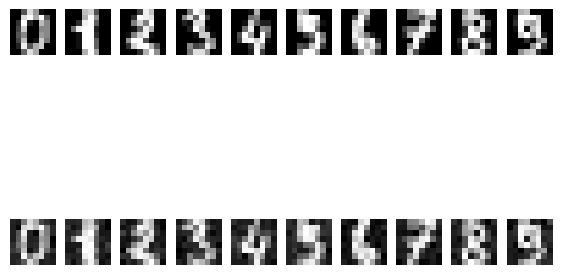

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Accuracy score with PCA: 0.03060656649972176


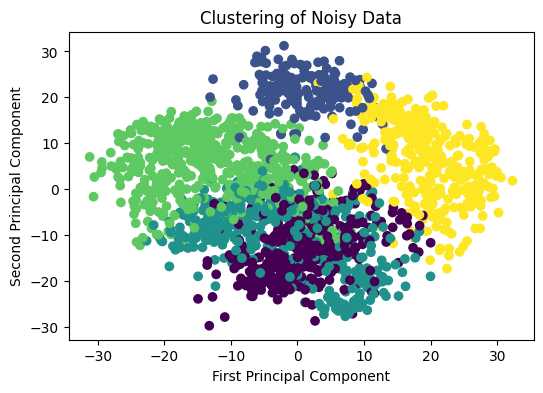

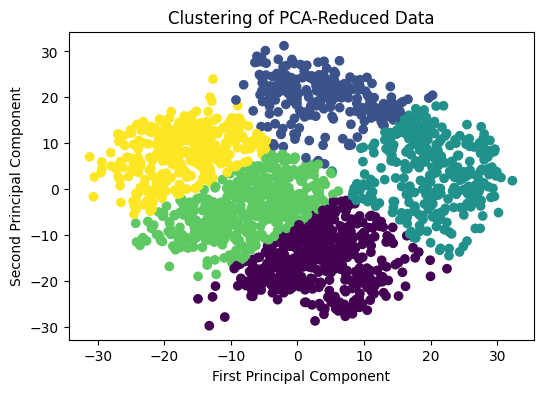

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

digit=load_digits()

noise=np.random.normal(0,1,size=digit.data.shape)
noise_digit=digit.data+noise

KMean_noise=KMeans(n_clusters=5,random_state=42)
KMean_noise.fit(noise_digit)

predict_noisy=KMean_noise.predict(noise_digit)
noisy_matrix=confusion_matrix(digit.target,predict_noisy)
print("Accuracy score without PCA:",accuracy_score(digit.target,KMean_noise.labels_))

fig,ax=plt.subplots(2,10,figsize=(7,5))
for i in range(10):
    ax[0][i].imshow(digit.data[i].reshape(8, 8),cmap='gray')
    ax[0][i].axis('off')
for i in range(10):
    ax[1][i].imshow(noise_digit[i].reshape(8, 8),cmap='gray')
    ax[1][i].axis('off')
plt.show()

pca=PCA(n_components=2)
pca_noisy=pca.fit_transform(noise_digit)

KMean_pca=KMeans(n_clusters=5,random_state=42)
KMean_pca.fit(pca_noisy)

predict_pca=KMean_pca.predict(pca_noisy)
pca_matrix=confusion_matrix(digit.target, predict_pca)
print("\nAccuracy score with PCA:", accuracy_score(digit.target,KMean_pca.labels_))

plt.figure(figsize=(6,4))
plt.scatter(pca_noisy[:,0],pca_noisy[:,1],c=predict_noisy)
plt.title('Clustering of Noisy Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.figure(figsize=(6,4))
plt.scatter(pca_noisy[:,0],pca_noisy[:,1],c=predict_pca)
plt.title('Clustering of PCA-Reduced Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()